In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(X_train)
print(y_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]


In [3]:
b_init = 100
w_init = np.array([1,1,1,1])

print(f"w_init shape: {w_init.shape}")

w_init shape: (4,)


In [4]:
def predict(x, w, b):
    """Make the prediction by"""
    return np.dot(x, w) + b


def compute_cost(X, y, w, b):
    shape = X.shape[0]
    cost = 0
    for i in range(shape):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost = cost / (2*shape)
    return cost

In [5]:
print(X_train[1])
print(f"The correct price: {y_train[1]}")


print(f"Predicted price: {predict(X_train[1], w_init, b_init)}")


print(f"Cost with initial parameters: {compute_cost(X_train, y_train, w_init, b_init)}")

[1416    3    2   40]
The correct price: 232
Predicted price: 1561
Cost with initial parameters: 941268.3333333334


In [6]:
def compute_gradient(X, y, w, b):
    """Refer to Eqs. (6) and (7) in the lecture code file"""
    m, n = X.shape    # number of training examples, number of features
    dj_w = np.zeros(n)
    dj_b = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_w[j] += err * X[i, j]
        dj_b += err
    return dj_w/m, dj_b/m

In [7]:
# Gradient descent with multiple variables

def gradient_descent(X, y, w_in, b_in, cost_funtion, gradient_function, alpha, num_iters):
    """
    Perform batch gradient descent.
    alpha: learning rate
    num_iters: number of iterations
    """
    J_history = []
    # w = np.copy(w_in)
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        # Compute the gradient
        dj_w, dj_b = gradient_function(X, y, w, b)

        # Update parameters
        w = w - alpha * dj_w
        b += -alpha * dj_b

        J_history.append(cost_funtion(X, y, w, b))

        if i % np.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history


In [23]:
# initialize parameters
initial_w = np.zeros_like(w_init)
# initial_w = w_init
print(initial_w)
initial_b = 1.
# some gradient descent settings
iterations = 10000
# alpha = 5.0e-7
alpha = 8.0e-9
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

[0 0 0 0]
Iteration    0: Cost 47392.51
Iteration 1000: Cost   701.78
Iteration 2000: Cost   701.60
Iteration 3000: Cost   701.42
Iteration 4000: Cost   701.24
Iteration 5000: Cost   701.06
Iteration 6000: Cost   700.88
Iteration 7000: Cost   700.71
Iteration 8000: Cost   700.53
Iteration 9000: Cost   700.35
b,w found by gradient descent: 1.00,[ 0.2   0.   -0.   -0.01] 
prediction: 425.40, target value: 460
prediction: 286.56, target value: 232
prediction: 172.75, target value: 178


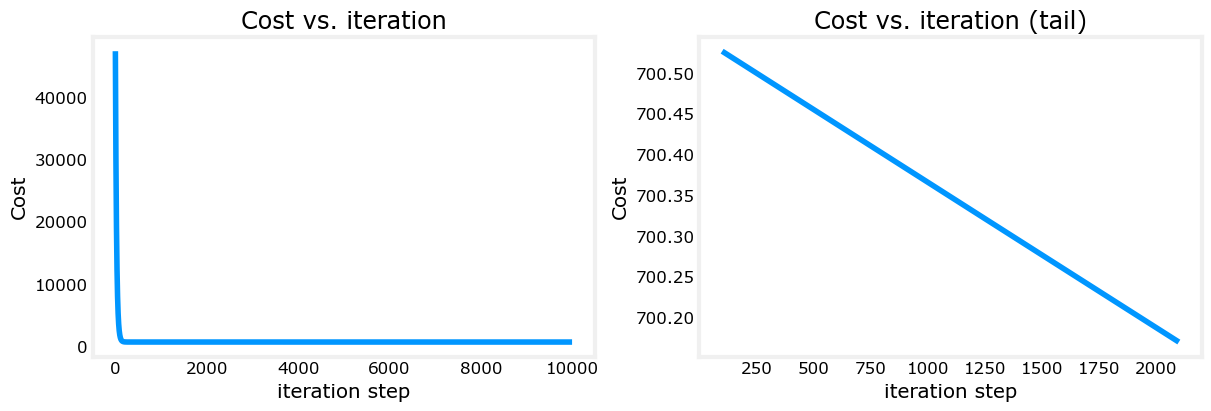

In [25]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[8000:])), J_hist[8000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()